In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
import numpy as np
import pandas as pd
import h5py
import python_utils_jjm as utils_jjm
from tqdm import tqdm
from scipy import stats
from scipy import signal 
from importlib import reload
from matplotlib import pyplot as plt
import itertools
import miniscope_analysis as ma

In [5]:
dir_path = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/'

In [6]:
mouse = 'GRIN032'

In [7]:
session = pd.read_hdf(dir_path+mouse+'_aligned_to_behavior.h5')

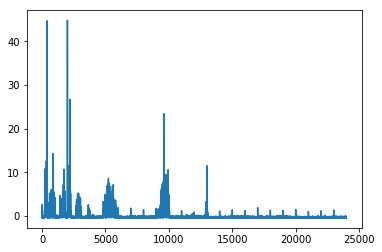

In [8]:
## behavior trace should now be roughly 20 fps 
plt.plot(session['behavior']['velocity_z_score'])

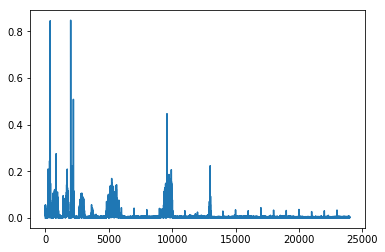

In [9]:
plt.plot(session['behavior']['velocity'])

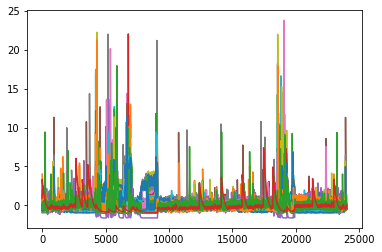

In [10]:
plt.plot(session['C_z_scored'])
plt.show()

In [11]:
#get time where velocity crosses threshold 

sample_points = ma.count_events_in_array(session['behavior']['velocity_z_score'].values, 50, 0.1, threshold=3, up=True)[1]
sorted = []
fs = 20
# select events where mouse was not moving for 4 seconds before moving 
time_sort = (5*20, 1*20)
for event in sample_points:
    # sort based on velocity before movement  
    if len(ma.count_events_in_array(session['behavior']['velocity_z_score'].values[event-time_sort[0]:event-time_sort[1]], 50, 0.1, threshold=1, up=True)[1]) == 0:
        sorted.append(event)
sorted = np.array(sorted)

In [12]:
len(sorted)

6

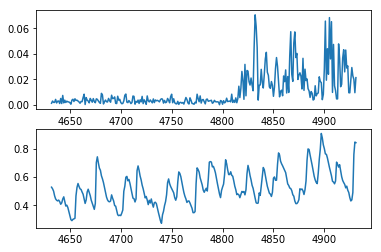

In [18]:
# plot individual detected events 
to_plot = (10*20, 5*20)

event = sorted[5]

plt.subplot(2, 1, 1)
plt.plot(session['behavior']['velocity'][event-to_plot[0]:event+to_plot[1]])
plt.subplot(2, 1, 2)
plt.plot(session['C_z_scored'].mean(axis=1)[event-to_plot[0]:event+to_plot[1]])

In [19]:
# plot averages 
triggered_events_v = []
triggered_events_f = [ ]
to_plot = (10*20, 5*20)
for event in sorted:
    triggered_events_v.append(session['behavior']['velocity_z_score'][event-to_plot[0]:event+to_plot[1]].reset_index(drop=True))
    triggered_events_f.append(session['C_z_scored'][event-to_plot[0]:event+to_plot[1]].reset_index(drop=True))
combined_f = pd.concat(triggered_events_f, axis=1, ignore_index=True)
combined_v = pd.concat(triggered_events_v, axis=1, ignore_index=True)
combined = pd.concat([combined_f, combined_v], axis=1, keys=['fluorescence_z_score', 'velocity_z_score'])
combined.to_csv(dir_path+mouse+'_velocity_triggered_events.h5')

In [20]:
combined.shape

(300, 270)

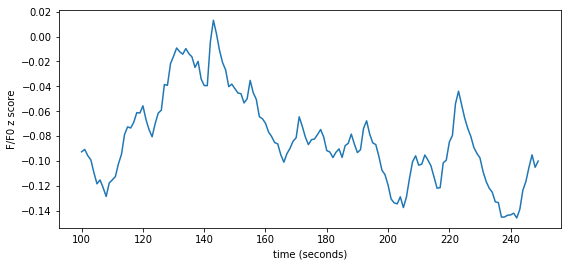

In [22]:
fig, ax = plt.subplots(figsize=(9, 4))
plt.plot(combined_f.mean(axis=1)[100:250])
plt.ylabel('F/F0 z score')
plt.xlabel('time (seconds)')
plt.draw()
plt.savefig('/Users/johnmarshall/Dropbox (Personal)/Grants_Fellowships/R01_progress_report_2019/wt_flouro_rep_event.png')
plt.savefig('/Users/johnmarshall/Dropbox (Personal)/Grants_Fellowships/R01_progress_report_2019/wt_flouro_rep_event.svg', transparent=True, format="svg")

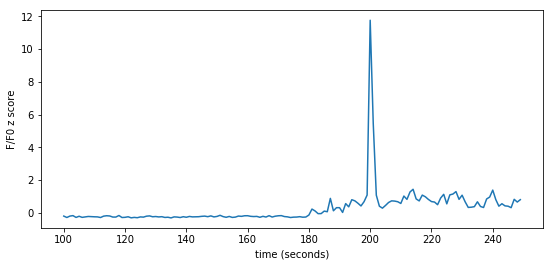

In [23]:
fig, ax = plt.subplots(figsize=(9, 4))
plt.plot(combined_v.mean(axis=1)[100:250])
plt.ylabel('F/F0 z score')
plt.xlabel('time (seconds)')
plt.draw()
plt.savefig('/Users/johnmarshall/Dropbox (Personal)/Grants_Fellowships/R01_progress_report_2019/wt_vel_rep_event.png')
plt.savefig('/Users/johnmarshall/Dropbox (Personal)/Grants_Fellowships/R01_progress_report_2019/wt_vel_rep_event.svg', transparent=True, format="svg")

In [ ]:
#combined_by_mouse=[]
#mouse_names = []

In [24]:
all_combined_events = pd.read_hdf('/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/all_mice_aligned_to_behavior.h5')

In [36]:
pd.concat([session], keys =['GRIN032'], axis=1).head()

GRIN032                                                            \
  behavior                                                             
  frameNum camNum sysClock buffer behavCam_frames sys_clock_behavCam   
0        1      0        0      1               1                  0   
1        2      0       39      1               2                 38   
2        3      0       88      1               3                 87   
3        4      0      138      1               4                119   
4        5      0      192      1               6                187   

                                                      ...             \
                                                      ... C_z_scored   
  Unnamed: 0            File           X           Y  ...         34   
0          0  behavCam01.avi  457.613571  381.345219  ...   1.945256   
1          1  behavCam01.avi  457.732325  380.557667  ...   1.849589   
2          2  behavCam01.avi  457.915690  381.168368  ...   1.756501   
3          3  behavCam01.avi  458.050047  382.041098  ...   1.665921   
4          4  behavCam01.avi  458.292518  381.603475  ...   1.577783   

                                                                         \
                                                                          
         35        36        37        38        39        40        41   
0 -0.373732  0.217412  0.275235 -0.412635 -0.347185  0.757467  0.086507   
1 -0.378930  0.194355  0.258418 -0.014215  0.024000  0.666505  0.056907   
2 -0.383959  0.172010  0.241963 -0.033274 -0.018181  0.581682  0.028163   
3 -0.388825  0.150355  0.225862 -0.051741 -0.057526  0.502582  0.000250   
4 -0.393533  0.129368  0.210108 -0.069638 -0.094224  0.428819  0.312185   

                       
                       
         42        43  
0  0.105644  0.970088  
1  0.051431  1.198455  
2 -0.000132  1.898681  
3 -0.049174  2.435859  
4 -0.095818  2.654884  

[5 rows x 58 columns]

In [41]:
#all_combined_events = all_combined_events.drop(['GRIN032'], axis=1)

In [43]:
all_combined_events.head()

GRIN011                                                              \
  C_z_scored                                                               
           0         1         2         3         4         5         6   
0  -0.228888 -0.347683 -0.084443  0.315216  0.736817  0.050184 -0.410957   
1  -0.244563 -0.347918 -0.103346  0.271259  0.678833  0.020152 -0.416319   
2  -0.259137 -0.348129 -0.121097  0.229800  0.623781 -0.007913 -0.421413   
3  -0.272688 -0.348320 -0.137766  0.190696  0.571513 -0.034137 -0.426252   
4  -0.177926 -0.348492 -0.153420  0.153814  0.521888 -0.058643 -0.430848   

                                 ...     GRIN027                             \
                                 ...    behavior                              
          7         8         9  ...           Y behavCam_frames behav_time   
0  0.097476  3.419068  0.139459  ...  186.554970             1.0        0.0   
1  0.068316  3.185303  0.110913  ...  188.167240             2.0       33.0   
2  0.040584  2.965232  0.083968  ...  190.981512             4.0       66.0   
3  0.014210  2.758052  0.058535  ...  193.573317             5.0       99.0   
4 -0.010873  2.563009  0.034529  ...  196.173484             7.0      132.0   

                                                                \
                                                                 
  buffer camNum frameNum sysClock sys_clock_behavCam  velocity   
0    1.0    0.0      1.0      0.0                0.0  0.000000   
1    1.0    0.0      2.0     39.0               26.0  0.084195   
2    1.0    0.0      3.0     89.0               91.0  0.117256   
3    1.0    0.0      4.0    139.0              123.0  0.098128   
4    1.0    0.0      5.0    189.0              187.0  0.109944   

                    
                    
  velocity_z_score  
0        -0.736585  
1         1.415770  
2         2.260959  
3         1.771965  
4         2.074030  

[5 rows x 463 columns]

In [48]:
all_combined_events = all_combined_events.join(pd.concat([session], keys =['GRIN032'], axis=1))
all_combined_events = all_combined_events.loc[~all_combined_events.index.duplicated(keep='first')]

In [50]:
all_combined_events.head()

GRIN011                                                              \
  C_z_scored                                                               
          0         1         2         3         4         5         6    
0  -0.228888 -0.347683 -0.084443  0.315216  0.736817  0.050184 -0.410957   
1  -0.244563 -0.347918 -0.103346  0.271259  0.678833  0.020152 -0.416319   
2  -0.259137 -0.348129 -0.121097  0.229800  0.623781 -0.007913 -0.421413   
3  -0.272688 -0.348320 -0.137766  0.190696  0.571513 -0.034137 -0.426252   
4  -0.177926 -0.348492 -0.153420  0.153814  0.521888 -0.058643 -0.430848   

                                 ...    GRIN032                                \
                                 ... C_z_scored                                 
         7         8         9   ...         34        35        36        37   
0  0.097476  3.419068  0.139459  ...   1.945256 -0.373732  0.217412  0.275235   
1  0.068316  3.185303  0.110913  ...   1.849589 -0.378930  0.194355  0.258418   
2  0.040584  2.965232  0.083968  ...   1.756501 -0.383959  0.172010  0.241963   
3  0.014210  2.758052  0.058535  ...   1.665921 -0.388825  0.150355  0.225862   
4 -0.010873  2.563009  0.034529  ...   1.577783 -0.393533  0.129368  0.210108   

                                                               
                                                               
         38        39        40        41        42        43  
0 -0.412635 -0.347185  0.757467  0.086507  0.105644  0.970088  
1 -0.014215  0.024000  0.666505  0.056907  0.051431  1.198455  
2 -0.033274 -0.018181  0.581682  0.028163 -0.000132  1.898681  
3 -0.051741 -0.057526  0.502582  0.000250 -0.049174  2.435859  
4 -0.069638 -0.094224  0.428819  0.312185 -0.095818  2.654884  

[5 rows x 521 columns]

In [51]:
#all_combined_events = pd.concat([all_combined_events, pd.concat([session], keys =['GRIN032'], axis=1)], axis=1, ignore_index = True)

In [52]:
all_combined_events.to_hdf(dir_path+'all_mice_aligned_to_behavior.h5', key='df')

In [109]:
combined_by_mouse.append(combined)
mouse_names.append(mouse)

In [110]:
mouse_names

['GRIN018', 'GRIN012', 'GRIN011']

In [111]:
#combined_by_mouse[0].head()

In [112]:
ko_combined = pd.concat(combined_by_mouse, axis =1, keys=mouse_names)


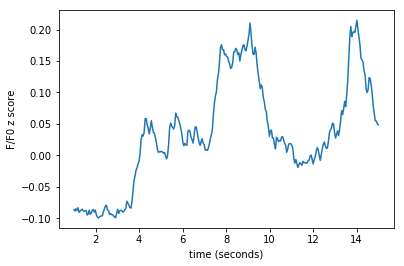

In [131]:
#wt_combined['fluorescence_z_score']
plt.plot(np.linspace(1, len(wt_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1))/20, 
                  len(wt_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1)),), 
                  wt_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1))
plt.ylabel('F/F0 z score')
plt.xlabel('time (seconds)')
plt.draw()
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/wt_flouro_events.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/wt_flouro_events.svg', transparent=True, format="svg")

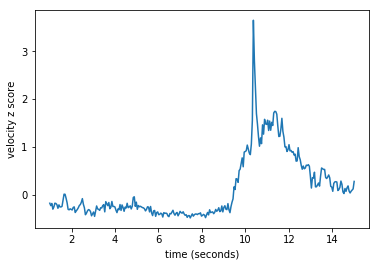

In [132]:
#wt_combined['fluorescence_z_score']
plt.plot(np.linspace(1, len(wt_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1))/20, 
                  len(wt_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1)),), 
                  wt_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1))
plt.ylabel('velocity z score')
plt.xlabel('time (seconds)')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/wt_velocity_events.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/wt_velocity_events.svg', transparent=True, format="svg")

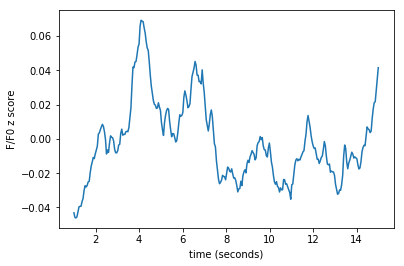

In [12]:
#wt_combined['fluorescence_z_score']
plt.plot(np.linspace(1, len(ko_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1))/20, 
                  len(ko_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1)),), 
                  ko_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1))
plt.ylabel('F/F0 z score')
plt.xlabel('time (seconds)')
plt.savefig('/Volumes/My_Passport/mGluR5/Dec2019_progressreport/ko_fluoro_events.png')
plt.savefig('/Volumes/My_Passport/mGluR5/Dec2019_progressreport/ko_fluoro_events.svg', transparent=True, format="svg")

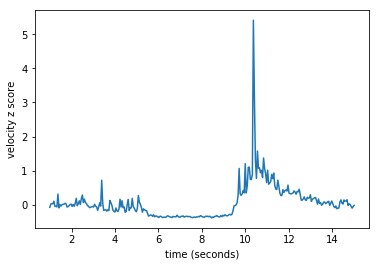

In [134]:
#wt_combined['fluorescence_z_score']
plt.plot(np.linspace(1, len(ko_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1))/20, 
                  len(ko_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1)),), 
                  ko_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1))
plt.ylabel('velocity z score')
plt.xlabel('time (seconds)')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/ko_velocity_events.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/ko_velocity_events.svg', transparent=True, format="svg")

In [117]:
all_combined_events = pd.concat([wt_combined, ko_combined], axis=1, keys=['wt', 'ko'])

In [121]:
all_combined_events.to_hdf(dir_path+'_velocity_triggered_events.h5', key='df')

In [6]:
all_combined_events = pd.read_hdf(dir_path+'_velocity_triggered_events.h5', key='df')

In [10]:
ko_combined = all_combined_events['ko']